<a href="https://colab.research.google.com/github/JiaminJIAN/20MA573/blob/master/src/BSM_formula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BSM formula

## Abstract

- create GBM class
- define a method for BSM formula for a given option type

## Anal

BS model assumes the distribution of stock as lognormal. In particular, it writes 
$$\ln \frac{S(T)}{S(0)} \sim \mathcal N((r  - \frac 1 2 \sigma^2) T, \sigma^2 T)$$
with respect to risk neutral measure. In the above, the parameters stand for

* $S(0)$: The initial stock price
* $S(T)$: The stock price at $T$
* $r$: interest rate
* $\sigma$: volatility




The call and put price with maturity $T$ and $K$ will be known as $C_0$ and $P_0$ given as below:
$$C_0 = \mathbb E [e^{-rT} (S(T) - K)^+] = S_0  \Phi(d_1) - K e^{-rT} \Phi(d_2),$$
and 
$$P_0 = \mathbb E [e^{-rT} (S(T) - K)^-] = K e^{-rT} \Phi(- d_2) - S_0  \Phi(- d_1),$$
where $d_i$ are given as
$$d_1 = \frac{(r + \frac 1 2 \sigma^2) T - \ln \frac{K}{S_0}}{\sigma \sqrt T},$$
and
$$d_2 = \frac{(r - \frac 1 2 \sigma^2) T - \ln \frac{K}{S_0}}{\sigma \sqrt T} = d_1 - \sigma \sqrt T$$

Put-call parity will be useful:
    $$C_0 - P_0 =  S(0) - e^{-rT} K.$$

## Code

We reload the european option class created before.

In [0]:
'''=========
option class init
=========='''
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])

In [0]:
import numpy as np
import scipy.stats as ss

Next, we create the gbm class, which is 
determined by three parameters. We shall initialize it
as it  is created.

In [0]:
'''============
Gbm class inherited from sde_1d
============='''

class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio

BSM formula is given by a method of Gbm class with an input of an option.

In [0]:
'''========
Black-Scholes-Merton formula. 
=========='''

def bsm_price(self, vanilla_option):
    s0 = self.init_state
    sigma = self.vol_ratio
    r = self.drift_ratio
    
    otype = vanilla_option.otype
    k = vanilla_option.strike
    maturity = vanilla_option.maturity
    
    d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
          * maturity) / (sigma * np.sqrt(maturity))
    d2 = d1 - sigma * np.sqrt(maturity)
    
    return (otype * s0 * ss.norm.cdf(otype * d1) #line break needs parenthesis
            - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))

Gbm.bsm_price = bsm_price

In [5]:
'''===============
Test bsm_price
================='''
gbm1 = Gbm()
option1 = VanillaOption()
print('>>>>>>>>>>call value is ' + str(gbm1.bsm_price(option1)))
option2 = VanillaOption(otype=-1)
print('>>>>>>>>>>put value is ' + str(gbm1.bsm_price(option2)))


>>>>>>>>>>call value is 5.943273183452838
>>>>>>>>>>put value is 10.84042522804176


In [6]:
sigma_list = []
option_price_list = []

for i in range(10):
  sigma = .1+i*.02
  sigma_list.append(sigma)
  gbm1.vol_ratio=sigma
  option_price = gbm1.bsm_price(option1)
  option_price_list.append(option_price)
  print('>>vol:'+str(sigma)+', price: ' + str(option_price))

>>vol:0.1, price: 2.094566693700095
>>vol:0.12000000000000001, price: 2.8364254855288706
>>vol:0.14, price: 3.5982676763682946
>>vol:0.16, price: 4.37262749780448
>>vol:0.18, price: 5.155187895384778
>>vol:0.2, price: 5.943273183452838
>>vol:0.22, price: 6.735127818843772
>>vol:0.24000000000000002, price: 7.529543360290944
>>vol:0.26, price: 8.325652794201723
>>vol:0.28, price: 9.1228109694867


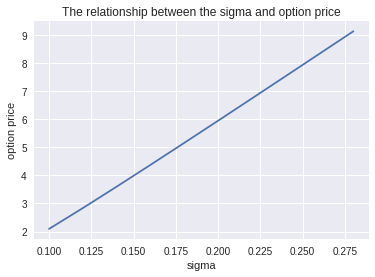

In [7]:
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

plt.plot(sigma_list, option_price_list)

#decorations
plt.xlabel('sigma')
plt.ylabel('option price')
plt.title('The relationship between the sigma and option price');
plt.show()

As the increase of sigma, the call option's price will be higher. Then for the put option, we have:

In [8]:
sigma_list = []
option_price_list = []

for i in range(10):
  sigma = .1+i*.02
  sigma_list.append(sigma)
  gbm1.vol_ratio=sigma
  option_price = gbm1.bsm_price(option2)
  option_price_list.append(option_price)
  print('>>vol:'+str(sigma)+', price: ' + str(option_price))

>>vol:0.1, price: 6.991718738289009
>>vol:0.12000000000000001, price: 7.733577530117785
>>vol:0.14, price: 8.495419720957194
>>vol:0.16, price: 9.269779542393387
>>vol:0.18, price: 10.052339939973677
>>vol:0.2, price: 10.84042522804176
>>vol:0.22, price: 11.632279863432672
>>vol:0.24000000000000002, price: 12.426695404879844
>>vol:0.26, price: 13.22280483879063
>>vol:0.28, price: 14.019963014075621


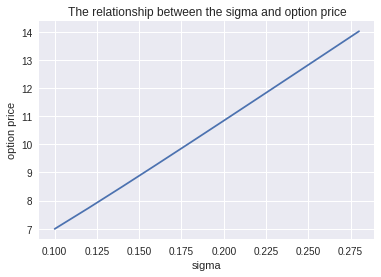

In [9]:
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

plt.plot(sigma_list, option_price_list)

#decorations
plt.xlabel('sigma')
plt.ylabel('option price')
plt.title('The relationship between the sigma and option price');
plt.show()

Similarly, as the increase of sigma, the price of this put option is also increasing.

Now we give the mathematic explanation.

**Prove:** When vol is increasing, the option price is increasing?

**Proof:**

For the call option, we have

$$C_{t} = S_{t} \mathcal{N}(d_{1}) - K e^{-r(T-t)} \mathcal{N}(d_{2}),$$

where

$$d_{1} = \frac{ln(\frac{S_{t}}{K}) + (r + \frac{1}{2}\sigma^{2})(T-t)}{\sqrt{\sigma^{2}(T-t)}}$$

and 

$$d_{2} = d_{1} - \sigma \sqrt{T-t}.$$

We need to calculate $\frac{\partial C_t}{\partial \sigma}$, by the chain rule, we have

$$\frac{\partial C_t}{\partial \sigma} = S_{t}\frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{\partial d_{1}}{\partial \sigma} -K e^{-r(T-t)} \frac{\partial \mathcal{N}(d_{2})}{\partial d_{2}} \frac{\partial d_{2}}{\partial \sigma}.$$

Since $\frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} = \frac{1}{\sqrt{2 \pi}} e^{- \frac{d_1^2}{2}}$, $\frac{\partial \mathcal{N}(d_{2})}{\partial d_{2}} = \frac{1}{\sqrt{2 \pi}} e^{- \frac{d_2^2}{2}}$, and $d_2 = d_{1} - \sigma \sqrt{T-t}$, we have

$$\frac{\partial \mathcal{N}(d_{2})}{\partial d_{2}} = \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} e^{d_1 \sigma \sqrt{T-t} - \frac{1}{2}\sigma^{2} (T-t)},$$

by the definition of $d_1$, we have

$$\frac{\partial \mathcal{N}(d_{2})}{\partial d_{2}} = \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{S_{t}}{K} e^{r(T-t)}.$$

Such that

$$\frac{\partial C_t}{\partial \sigma} = S_{t} \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{\partial d_{1}}{\partial \sigma} -  K e^{-r(T-t)} \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{S_{t}}{K} e^{r(T-t)} (\frac{\partial d_{1}}{\partial \sigma} - \sqrt{T-t}),$$

so we have

$$\frac{\partial C_t}{\partial \sigma} = S_{t} \sqrt{T-t} \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \geq 0.$$

Then by the put-call parity, we have

$$C_t + K e^{-r(T-t)} = P_t + S_{t},$$

we take derivative to $\sigma$ on the both side, 

$$\frac{\partial C_t}{\partial \sigma} = \frac{\partial P_t}{\partial \sigma} = S_{t} \sqrt{T-t} \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \geq 0.$$

Such that when volitility is increasing, the option price is also increasing.